In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import sys 
sys.path.append("/Users/pozzolabadmin/Documents/codebase/experiments/peptide_phase_mapping")
from utils import plot_phasemap
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from mpl_toolkits.axes_grid1 import make_axes_locatable
import glob 

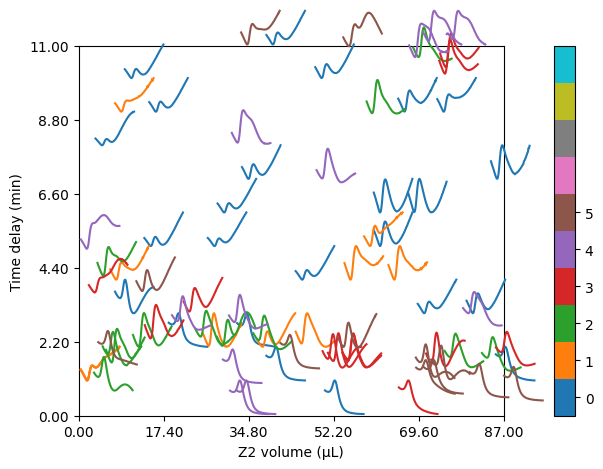

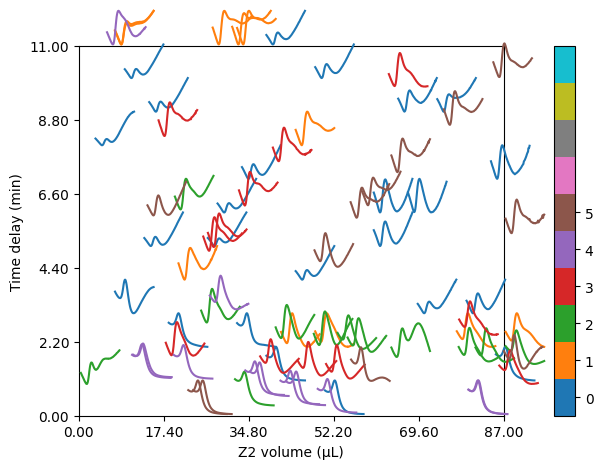

In [2]:
iters = len(glob.glob("../opentrons/directions_*.npy"))+1
bounds = np.asarray([(0.0, 87.0), (0.0,11.0)]).T
cmap = plt.get_cmap("tab10")
norm = Normalize(vmin=0, vmax = 10)
mappable = ScalarMappable(norm=norm, cmap=cmap)

def plot_uvvis_iterwise(campaign):
    fig, ax = plt.subplots()
    for itr in range(iters):
        if itr==0:
            tag = "0.npy"
        else:
            tag = "%d%s.npy"%(itr, campaign)
        comps = np.load("../data/comps_"+tag)
        spectra = np.load("../data/spectra_"+tag)

        plot_phasemap(bounds, ax, comps, spectra, color=cmap(norm(itr)))
        ax.set_xlabel('Z2 volume (µL)')
        ax.set_ylabel('Time delay (min)') 
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.5)
    cbar = fig.colorbar(mappable, cax=cax)
    cbar.set_ticks(np.arange(iters)+0.5)
    cbar.set_ticklabels(np.arange(iters))
    plt.show()

    return 
plot_uvvis_iterwise(1)
plot_uvvis_iterwise(2)